# Imports

In [1]:
import sys, os

root_dir = os.path.join(os.getcwd(), '..')
sys.path.append(root_dir)

from src.io import output, input
from src.io import conversion as conv
import music21

pygame 2.0.1 (SDL 2.0.14, Python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\Eric\miniconda3\envs\mpro\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
midi = input.loadMidiFile('../midi/examples/monophonic/pinkpanther_4b.mid')

In [3]:
output.pianoRoll(midi)
midi.instruments[0].notes

Loading BokehJS ...

[Note(start=0.000000, end=0.166667, pitch=52, velocity=115),
 Note(start=0.833333, end=1.000000, pitch=54, velocity=115),
 Note(start=1.000000, end=1.166667, pitch=55, velocity=115),
 Note(start=1.833333, end=2.000000, pitch=51, velocity=115),
 Note(start=2.000000, end=2.166667, pitch=52, velocity=115),
 Note(start=2.333333, end=2.500000, pitch=54, velocity=115),
 Note(start=2.500000, end=2.666667, pitch=55, velocity=115),
 Note(start=2.833333, end=3.000000, pitch=60, velocity=115),
 Note(start=3.000000, end=3.166667, pitch=59, velocity=115),
 Note(start=3.333333, end=3.500000, pitch=52, velocity=115),
 Note(start=3.500000, end=3.666667, pitch=55, velocity=115),
 Note(start=3.833333, end=4.000000, pitch=59, velocity=115),
 Note(start=4.000000, end=5.166667, pitch=58, velocity=115),
 Note(start=5.166667, end=5.333333, pitch=57, velocity=115),
 Note(start=5.333333, end=5.500000, pitch=55, velocity=115),
 Note(start=5.500000, end=5.666667, pitch=52, velocity=115),
 Note(start=5.666667, en

In [4]:
m21 = conv.pretty_midi_to_music21(midi)

not a note
start: 0.0 end: 0.0 <music21.tempo.MetronomeMark animato Quarter=120.0>
not a note
start: 0.0 end: 0.0 <music21.meter.TimeSignature 4/4>
start: 0.0 end: 0.16666666666666666 <music21.note.Note E>
start: 0.833333335 end: 1.0000000016666666 <music21.note.Note F#>
start: 1.0 end: 1.1666666666666667 <music21.note.Note G>
start: 1.833333335 end: 2.000000001666667 <music21.note.Note D#>
start: 2.0 end: 2.1666666666666665 <music21.note.Note E>
start: 2.333333335 end: 2.5000000016666664 <music21.note.Note F#>
start: 2.5 end: 2.6666666666666665 <music21.note.Note G>
start: 2.833333335 end: 3.0000000016666664 <music21.note.Note C>
start: 3.0 end: 3.1666666666666665 <music21.note.Note B>
start: 3.333333335 end: 3.5000000016666664 <music21.note.Note E>
start: 3.5 end: 3.6666666666666665 <music21.note.Note G>
start: 3.833333335 end: 4.000000001666667 <music21.note.Note B>
start: 4.0 end: 5.166666666666667 <music21.note.Note A#>
start: 5.166666665 end: 5.333333331666667 <music21.note.Note 

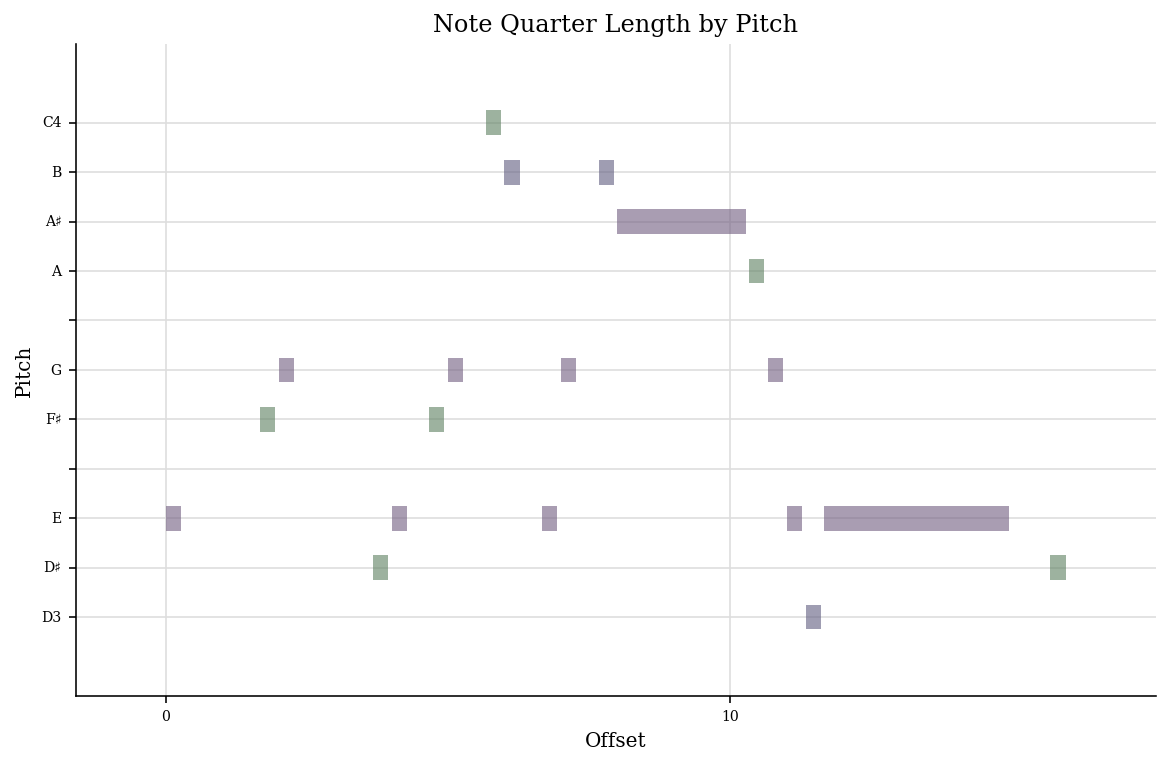

In [5]:
for n in m21.parts[0].secondsMap:
    if not isinstance(n['element'], music21.note.Note):
        print('not a note')
    print('start:', n['offsetSeconds'], 'end:', n['endTimeSeconds'], n['element'])
m21.show('text')
m21.plot()

In [6]:
remidi = conv.music21_to_pretty_midi(m21)
output.saveMidiFile(remidi, '../midi/tmp/conversion_cache.mid')
read_midi = input.loadMidiFile('../midi/tmp/conversion_cache.mid')
output.pianoRoll(read_midi)
read_midi.instruments[0].notes

[IO] file saved to:


d:\FH\Masterarbeit\Project\midi\tmp\conversion_cache.mid

Loading BokehJS ...

[Note(start=0.000000, end=0.166667, pitch=52, velocity=115),
 Note(start=0.833333, end=1.000000, pitch=54, velocity=115),
 Note(start=1.000000, end=1.166667, pitch=55, velocity=115),
 Note(start=1.833333, end=2.000000, pitch=51, velocity=115),
 Note(start=2.000000, end=2.166667, pitch=52, velocity=115),
 Note(start=2.333333, end=2.500000, pitch=54, velocity=115),
 Note(start=2.500000, end=2.666667, pitch=55, velocity=115),
 Note(start=2.833333, end=3.000000, pitch=60, velocity=115),
 Note(start=3.000000, end=3.166667, pitch=59, velocity=115),
 Note(start=3.333333, end=3.500000, pitch=52, velocity=115),
 Note(start=3.500000, end=3.666667, pitch=55, velocity=115),
 Note(start=3.833333, end=4.000000, pitch=59, velocity=115),
 Note(start=4.000000, end=5.166667, pitch=58, velocity=115),
 Note(start=5.166667, end=5.333333, pitch=57, velocity=115),
 Note(start=5.333333, end=5.500000, pitch=55, velocity=115),
 Note(start=5.500000, end=5.666667, pitch=52, velocity=115),
 Note(start=5.666667, en

In [14]:
print(m21.parts[0].duration.quarterLength)
round( float(m21.duration.quarterLength) / 4 )

34/3


3

In [18]:
float(m21.parts[0].notes[-1].offset) + float(m21.parts[0].notes[-1].quarterLength)

16.0